# Bank Customer Segmentation for Loan Campaign
##### Banks often have ****marketing campaigns**** for their individual products. 
##### Therabank is an established bank that offers personal loans as a product.
##### The task at hand is to create customer segments to maximize the effectiveness of their personal loan campaign. 
##### Goal is to:
- create ****customer segments**** for the marketing campaign
- identify which of these segments have the highest propensity to respond to the 
campaign


In [1]:
#Importing the Libraries 

import pandas as pd
import numpy as np
from  sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [2]:
# import the data 
file = "C:\\Users\\Mohannad.dawood\\Downloads\\Bank_Personal_Loan_Modelling-1.csv"
df= pd.read_csv(file)
df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


### exploring the data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## as we could discover :
- There is no missing values 
- There are 5000 records ( clients)with 13 features for each one of them 
- All the data is integer values , except one float values which is CCAVG ( average of credit card spending )

- **Experience**: The work experience of the customer in years.
- **Income**: The estimated annual income of the customer (thousands of 
US dollars).
- **CCAvg**: The average spending on credit cards per month (thousands of 
US dollars).
- **Mortgage**: The value of the customer's house mortgage (if any).
- **Age**: The age (in years) of the customer.

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Let us look at each feature and discuss the statistical values :
- Age between 23 and 67 
- Experience : we found the minimum value -3 which could not be meaningful , so I recommend to do more cleansing of this feature
- income between 8k and 224k , and 75% of the customers income under 98k , so I expect to have outlier which need to be removed to avoid any misleading values of our study 
- CCAV is like income , 75% of spending under 2500 while the maximum value 10,000 which is outliers propability 


## Experiense exploration 

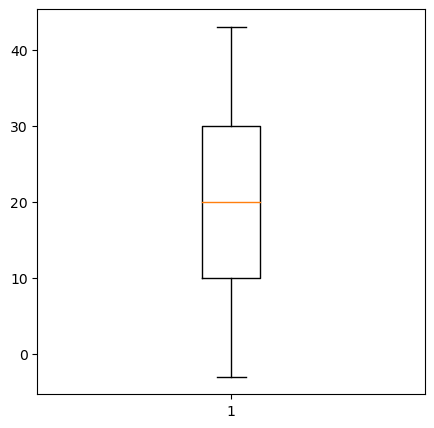

In [5]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(df['Experience'] )
plt.show()

In [6]:
df=df[df['Experience']>= 0]


## Income Explration 

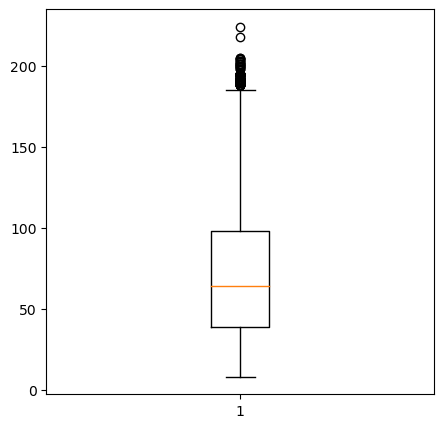

In [7]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(df['Income'] )
plt.show()

there is outlier above 169k , so it is better to remove this record to keep our study without outliers 

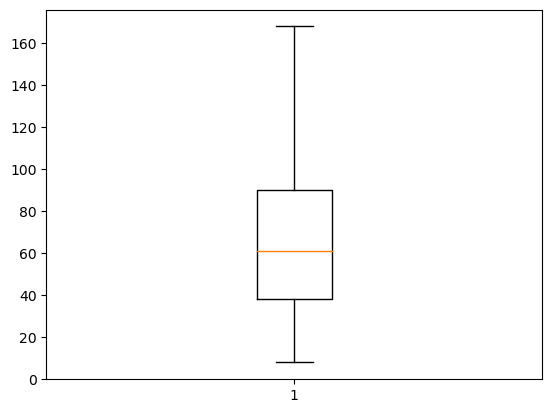

In [8]:
df=df[df['Income'] < 169]
plt.boxplot(df['Income'] )
plt.show()


# CCAVR Exploration 

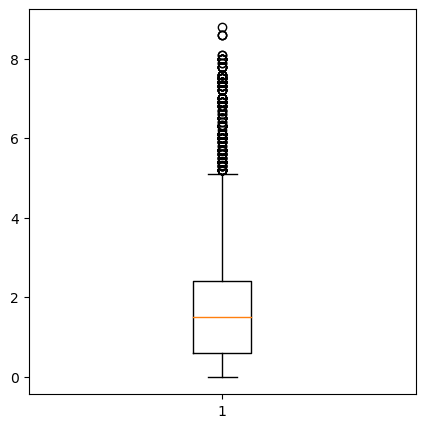

In [9]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(df['CCAvg'] )
plt.show()

there is outlier above 4600 , so it is better to remove this record to keep our study without outliers 

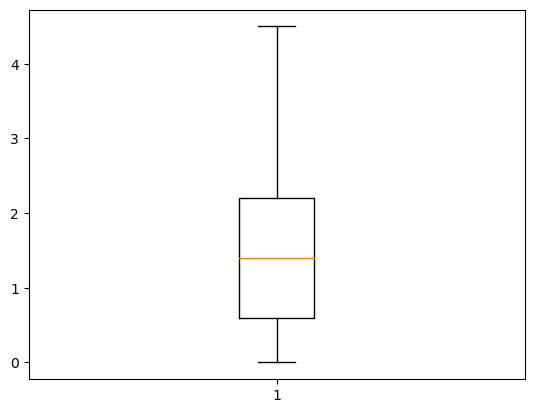

In [10]:
df=df[df['CCAvg'] < 4.6]
plt.boxplot(df['CCAvg'] )
plt.show()


In [11]:
# Data Frame after removing the outliers and misleading values has 4379 customers 
df.shape

(4379, 14)

Let us find the correlations between features of our customers to find out the best parameters of our clustering 

In [12]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.005160,-0.004585,0.001379,0.009990,-0.022210,-0.002365,0.027228,-0.000327,-0.008229,-0.021979,0.002717,-0.011065,0.019014
Age,-0.005160,1.000000,0.994075,-0.036022,-0.030280,-0.053288,-0.031611,0.042733,-0.017640,-0.003743,-0.002037,-0.001510,0.014161,0.001716
Experience,-0.004585,0.994075,1.000000,-0.028239,-0.029019,-0.058767,-0.035467,0.014769,-0.015561,-0.001388,-0.002894,0.001077,0.013640,0.002672
Income,0.001379,-0.036022,-0.028239,1.000000,-0.019684,-0.125233,0.474442,-0.167840,0.161658,0.397936,0.001152,0.085473,0.002727,-0.005964
ZIP Code,0.009990,-0.030280,-0.029019,-0.019684,1.000000,0.004854,-0.001828,-0.021165,0.012701,-0.007255,-0.005624,0.013030,0.021860,0.002993
Family,-0.022210,-0.053288,-0.058767,-0.125233,0.004854,1.000000,-0.041568,0.022748,-0.022651,0.029169,0.021422,-0.000728,0.010330,0.004709
CCAvg,-0.002365,-0.031611,-0.035467,0.474442,-0.001828,-0.041568,1.000000,-0.050012,0.061124,0.265161,0.024694,0.065235,-0.016574,-0.004001
Education,0.027228,0.042733,0.014769,-0.167840,-0.021165,0.022748,-0.050012,1.000000,-0.043606,0.071962,-0.016933,-0.017595,-0.018904,-0.015833
Mortgage,-0.000327,-0.017640,-0.015561,0.161658,0.012701,-0.022651,0.061124,-0.043606,1.000000,0.071677,-0.004192,0.054006,-0.013110,-0.013909
Personal Loan,-0.008229,-0.003743,-0.001388,0.397936,-0.007255,0.029169,0.265161,0.071962,0.071677,1.000000,0.004413,0.208093,-0.010353,-0.013267


- Age and Experience have high correlation 0.99
- Income and CCAvr have good correlation 0.47


Let us define the scale the values of our Data Frame module StandardScaler  

In [13]:
scaler= StandardScaler()
df_scale = df.copy()


df_scale.iloc[: , 1:13]=scaler.fit_transform(df_scale.iloc[: , 1:13])
df_scale.head(4)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,-1.817712,-1.708619,-0.393360,-0.942509,1.352067,0.104377,-1.099244,-0.572856,-0.233821,2.929515,-0.220479,-1.210642,0
1,2,-0.064287,-0.130314,-0.816384,-1.411322,0.486847,0.010884,-1.099244,-0.572856,-0.233821,2.929515,-0.220479,-1.210642,0
2,3,-0.590315,-0.481049,-1.465020,0.721364,-1.243593,-0.456579,-1.099244,-0.572856,-0.233821,-0.341353,-0.220479,-1.210642,0
3,4,-0.941000,-1.007150,1.044920,0.441365,-1.243593,1.132797,0.096976,-0.572856,-0.233821,-0.341353,-0.220479,-1.210642,0


Let us Clustering the customers according to Kmean for 4 groups according to their parameters 

In [14]:
module = KMeans(n_clusters=4 , random_state=1900 )
module.fit(df_scale.iloc[:,1:13])
df_scale['Group']=module.predict(df_scale.iloc[:,1:13])
df_scale.head(2)

c:\Users\Mohannad.dawood\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Group
0,1,-1.817712,-1.708619,-0.393360,-0.942509,1.352067,0.104377,-1.099244,-0.572856,-0.233821,2.929515,-0.220479,-1.210642,0,2
1,2,-0.064287,-0.130314,-0.816384,-1.411322,0.486847,0.010884,-1.099244,-0.572856,-0.233821,2.929515,-0.220479,-1.210642,0,2


we can find the four groups and the counts of each one of them 

In [15]:
df_scale.Group.value_counts()

1    1906
3    1814
2     432
0     227
Name: Group, dtype: int64

Lets Understand the Clustering meaning since this is unsupervised Segmentations of the customers 
We could do this exploration to understand the clustering of our groups by ploting each features with the groups to find where the best fit of this segmentations 


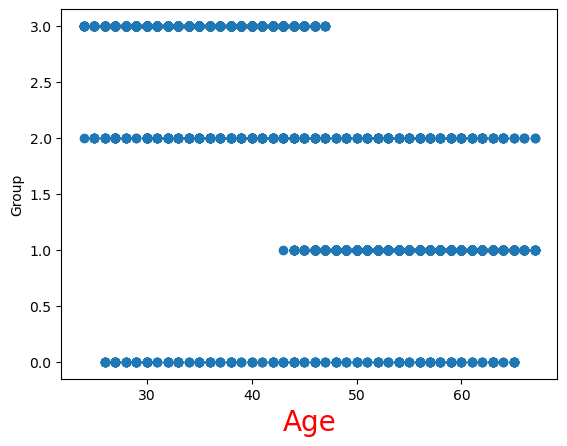

Group
0     227
1    1906
2     432
3    1814
Name: Age, dtype: int64

In [48]:
fig,ax = plt.subplots()
ax.scatter(df['Age'],df_scale['Group'])
ax.set_xlabel("Age",size=20, color="red")
ax.set_ylabel('Group')
plt.show()
df['Group']=df_scale['Group']
df.groupby(['Group'])['Age'].count()

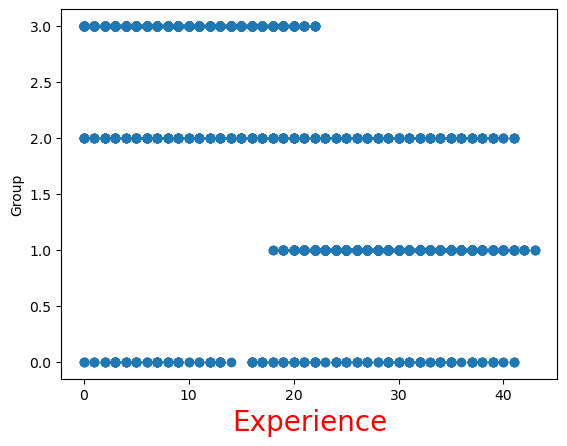

Group
0     227
1    1906
2     432
3    1814
Name: Experience, dtype: int64

In [50]:
fig,ax = plt.subplots()
ax.scatter(df['Experience'],df_scale['Group'])
ax.set_xlabel("Experience",size=20, color="red")
ax.set_ylabel('Group')
plt.show()
df['Group']=df_scale['Group']
df.groupby(['Group'])['Experience'].count()

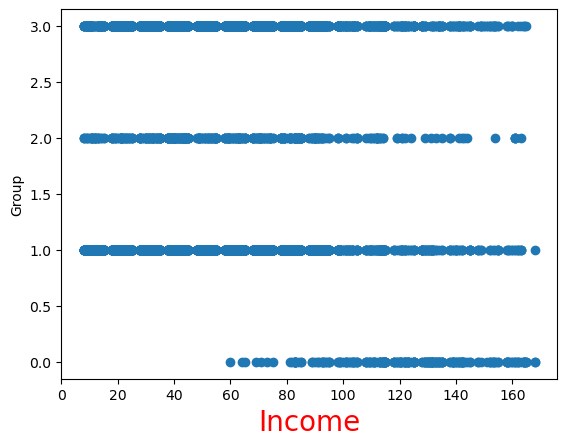

Group
0     227
1    1906
2     432
3    1814
Name: Income, dtype: int64

In [51]:
fig,ax = plt.subplots()
ax.scatter(df['Income'],df_scale['Group'])
ax.set_xlabel("Income",size=20, color="red")
ax.set_ylabel('Group')
plt.show()
df['Group']=df_scale['Group']
df.groupby(['Group'])['Income'].count()

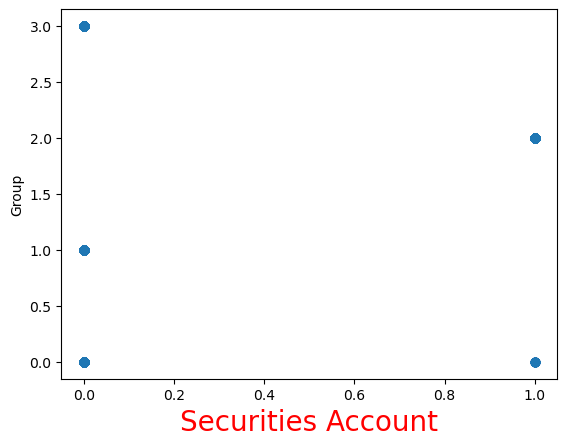

Group
0     227
1    1906
2     432
3    1814
Name: Securities Account, dtype: int64

In [63]:
fig,ax = plt.subplots()
ax.scatter(df['Securities Account'],df_scale['Group'])
ax.set_xlabel("Securities Account",size=20, color="red")
ax.set_ylabel('Group')
plt.show()
df['Group']=df_scale['Group']
df.groupby(['Group'])['Securities Account'].count()

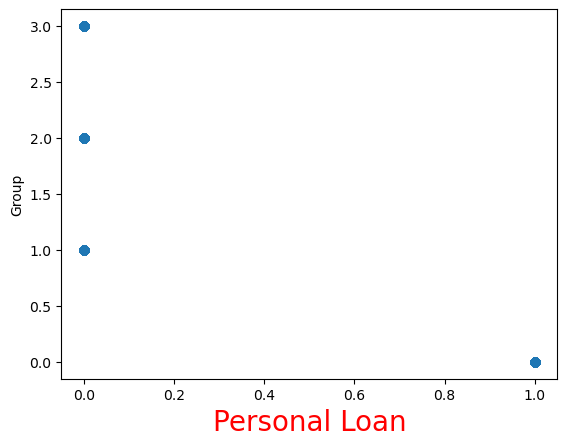

Group
0     227
1    1906
2     432
3    1814
Name: Personal Loan, dtype: int64

In [56]:
fig,ax = plt.subplots()
ax.scatter(df['Personal Loan'],df_scale['Group'])
ax.set_xlabel("Personal Loan",size=20, color="red")
ax.set_ylabel('Group')
plt.show()
df['Group']=df_scale['Group']
df.groupby(['Group'])['Personal Loan'].count()

## Groups Explanation:
# Group 1 
- counts 227
- Age under 47 years old 
- experience less than 20 years 
-do not have secuirities account 
- do not have personal loans 
# Group 2 
- have the largest count 1906
- have secuirities account 
- do not have personal loans 
# Group 3 
- counts 432
- Age more than 42 years old 
- experience more than 18 years 
-do not have secuirities account 
- do not have personal loans 
# Group 4
- seconde large group 1814 counts
- do not have secuirities account 
- have personal loans 
- income more than 60k yearly 


## Conclusions 
- Income has major role in taking the decision of personal loan , since Group 4 which includes the customer which has personal loan with income more than 60k, or maybe the previouse compaigns targeted this group for more safety standards 
- the first strategy needs to target the customer who has not personal loan and has income more than 60k , and this segmentation need to be the first persona to be included in awareness compaign 
-  to engage group 2 which their members have securities account and counts more than 40% of the customers, they need joint compaign to connect their secuirities account with a personel loan , and this would be different persona to be targeted 
- to engage Group 4 which their members have already personel loan, there must be an offer of gaining the ability of second personel loan, with lowering the rate of first loan  if they follow scheduled collection methode.
